In [ ]:
# default_exp cleaner

# Cleaner

> The module is build on top of [MolVS](https://github.com/mcs07/MolVS). 

The molecules are standardized with the following steps:
- Sanitizing with RDKit: santize mol; remove Hs; disconnect metals; normalize mol; reionize mol; recalculate stereochemistry.
- Replace all atoms with the most abundant isotope for that element.
- Remove counterions in the salts and neutralize the molecules.
- Remove the mixture.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
from rdkit import Chem
from molvs import Standardizer

def remove_mixture(mol):
    for n, frag in enumerate(Chem.GetMolFrags(mol, asMols=True), 1):
        if n > 1:
            raise Exception("mixture")
        if n == 1:
            parent = mol
        else:
            raise Exception("error")
    return parent

def MolStandardizer(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        smiles = Chem.MolToSmiles(mol) # canonical smiles
        mol = Chem.MolFromSmiles(smiles)
        
        s = Standardizer()
        mol = s.standardize(mol) #santize mol; remove Hs; disconnect metals; normalize mol; reionize mol
        mol = s.remove_fragments(mol) # The full list of FragmentPatterns: https://github.com/mcs07/MolVS/blob/master/molvs/fragment.py
        mol = s.uncharge(mol) # uncharge molecules by adding and/or removing hydrogens
        mol = s.isotope_parent(mol)
        mol = s.standardize(mol)
        mol = remove_mixture(mol)        
        return Chem.MolToSmiles(mol)
    except:
#         print("%s failed conversion"%smiles)
        return "NaN"

The [`.standardize()`](https://molvs.readthedocs.io/en/latest/guide/standardize.html) method standarizes a molecule with the following steps:
- RDKit Sanitize
- RDKit  RemoveHs
- Disconnect metals
- Apply normalization rules
- Reionize acids
    - If molecule with multiple acid groups in partially ionized, ensure strongest acids ionize first
- Recalculate stereochemistry
    - Use build-in RDKit functionality to force a clean recalculation of stereochemistry

Examples

Original SMILES:

In [ ]:
orig_smiles = ['[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1.C(Cl)(Cl)Cl',
              '[13C]c1[nH]n(C)c(=NC(C)c2ccc(C(F)(F)F)cc2)c1[N+](=O)[O-].O',
              'O.[Na]O[13C](=O)c1ccc(C[S+2]([O-])([O-]))cc1.C(=O)C[C@H](C)[C@H](N)C(O)=O',
              'C(=O)CC[C@@H](N)C(O)=O',
              'C(=O)CC[C@H](N)C(O)=O',
              'O=C1NC=CC=C1',
              'Oc1ccccn1']

Standardized SMILES:

In [ ]:
std_smiles = [MolStandardizer(smi) for smi in orig_smiles]

RDKit ERROR: [12:27:38] SMILES Parse Error: syntax error while parsing: NaN
RDKit ERROR: [12:27:38] SMILES Parse Error: Failed parsing SMILES 'NaN' for input: 'NaN'


,orig_smiles,std_smiles,Before Standardization,After Standardization
0,[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1.C(Cl)(C...,O=C(O)c1ccc(C[S](=O)=O)cc1,,
1,[13C]c1[nH]n(C)c(=NC(C)c2ccc(C(F)(F)F)cc2)c1[N...,[C]c1[nH]n(C)c(=NC(C)c2ccc(C(F)(F)F)cc2)c1[N+]...,,
2,O.[Na]O[13C](=O)c1ccc(C[S+2]([O-])([O-]))cc1.C...,NaN,,None
3,C(=O)CC[C@@H](N)C(O)=O,N[C@H](CCC=O)C(=O)O,,
4,C(=O)CC[C@H](N)C(O)=O,N[C@@H](CCC=O)C(=O)O,,
5,O=C1NC=CC=C1,O=c1cccc[nH]1,,
6,Oc1ccccn1,Oc1ccccn1,,

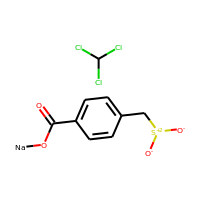
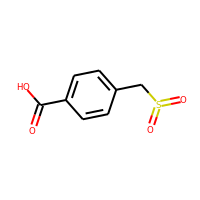
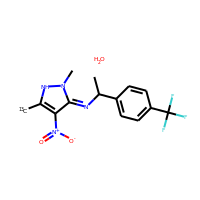
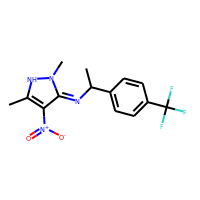
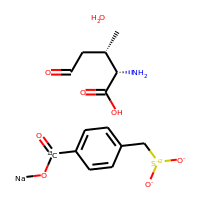
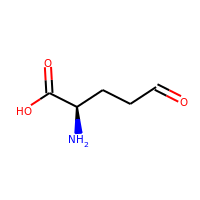
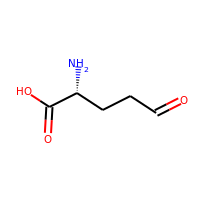
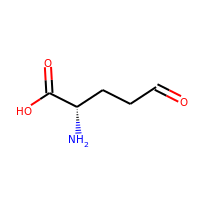
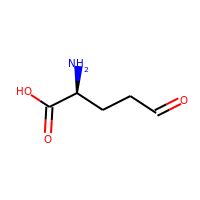
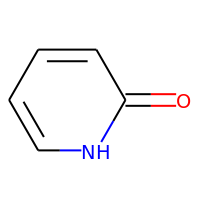
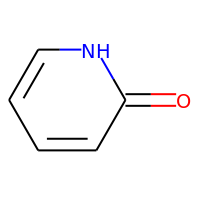
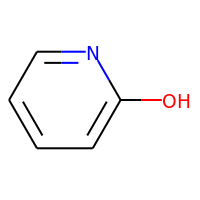
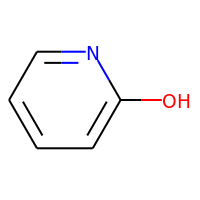

In [ ]:
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
df = pd.DataFrame({'orig_smiles': orig_smiles, 'std_smiles': std_smiles})
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='orig_smiles', molCol='Before Standardization')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='std_smiles', molCol='After Standardization')
df